In [1]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image

import torch
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import pandas as pd
import numpy as np

from Data.ReadDatasets import *
from VAE.VAE_pytorch import *
from Plotting.plot_latent_encoding import *


from Data.data_pipeline import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, SpectralEmbedding

Using TensorFlow backend.


In [2]:
#hyperparameters
kwargs, device, args=Parser(argparse)
args.epochs=100
args.learning_rate=1e-3
args.encoding_dim=50
#args.batch_size=128
args.batch_size=20
args.hidden_layers=[1000,100]
training=0.8

In [3]:
########### READ DATA ###########


dataset_train = ReadDataset_train_E_coli()
dataset_test = ReadDataset_test_E_coli()

train_loader = DataLoader(dataset=dataset_train,shuffle=True,
                         batch_size=args.batch_size, **kwargs)
test_loader = DataLoader(dataset=dataset_test,shuffle=True,
                         batch_size=args.batch_size, **kwargs)
print(train_loader)

Found 4297 genes in datafile
Found 4297 genes in datafile


In [4]:
print(dataset_test.y_data.shape)

torch.Size([227, 4297])


In [5]:
########### IMPORT MODEL AND OPTIMIZER ###########
model = VAE().to(device) # create VAE model 
optimizer = optim.Adam(model.parameters(), lr=args.learning_rate) # import optimizer
print(model)

VAE(
  (input_linear): Linear(in_features=4297, out_features=2000, bias=True)
  (enc_middle): Linear(in_features=2000, out_features=100, bias=True)
  (enc_1): Linear(in_features=100, out_features=5, bias=True)
  (enc_2): Linear(in_features=100, out_features=5, bias=True)
  (dec_0): Linear(in_features=5, out_features=100, bias=True)
  (dec_middle): Linear(in_features=100, out_features=2000, bias=True)
  (output_linear): Linear(in_features=2000, out_features=4297, bias=True)
)


In [6]:
########### TRAIN THE NETWORK ###########
if __name__ == "__main__":

    for epoch in range(1, int(args.epochs) + 1 ): # full loss function
        train(model, epoch, train_loader, optimizer) # 
        test(model, epoch, test_loader, optimizer)
        with torch.no_grad():
            sample = torch.randn(64, 5).to(device)
            sample = model.decode(sample).cpu()            

Train Epoch: 1 [0/680 (0%)]	Loss: 2984.585938
Train Epoch: 1 [200/680 (29%)]	Loss: 2847.906055
Train Epoch: 1 [400/680 (59%)]	Loss: 2810.493945
Train Epoch: 1 [600/680 (88%)]	Loss: 2808.730273
====> Epoch: 1 Average loss: 2855.7877
====> Test set loss: 2904.5205
Train Epoch: 2 [0/680 (0%)]	Loss: 2818.510352
Train Epoch: 2 [200/680 (29%)]	Loss: 2783.400195
Train Epoch: 2 [400/680 (59%)]	Loss: 2786.911133
Train Epoch: 2 [600/680 (88%)]	Loss: 2785.725391
====> Epoch: 2 Average loss: 2800.7369
====> Test set loss: 2859.2017
Train Epoch: 3 [0/680 (0%)]	Loss: 2761.251172
Train Epoch: 3 [200/680 (29%)]	Loss: 2761.408008
Train Epoch: 3 [400/680 (59%)]	Loss: 2807.490039
Train Epoch: 3 [600/680 (88%)]	Loss: 2801.597070
====> Epoch: 3 Average loss: 2782.2617
====> Test set loss: 2830.3461
Train Epoch: 4 [0/680 (0%)]	Loss: 2767.817578
Train Epoch: 4 [200/680 (29%)]	Loss: 2767.216211
Train Epoch: 4 [400/680 (59%)]	Loss: 2760.714844
Train Epoch: 4 [600/680 (88%)]	Loss: 2774.766992
====> Epoch: 4 Ave

====> Test set loss: 2753.0873
Train Epoch: 32 [0/680 (0%)]	Loss: 2697.362891
Train Epoch: 32 [200/680 (29%)]	Loss: 2723.342383
Train Epoch: 32 [400/680 (59%)]	Loss: 2710.590625
Train Epoch: 32 [600/680 (88%)]	Loss: 2684.975391
====> Epoch: 32 Average loss: 2698.7257
====> Test set loss: 2756.4002
Train Epoch: 33 [0/680 (0%)]	Loss: 2707.173047
Train Epoch: 33 [200/680 (29%)]	Loss: 2690.531641
Train Epoch: 33 [400/680 (59%)]	Loss: 2700.903320
Train Epoch: 33 [600/680 (88%)]	Loss: 2697.899219
====> Epoch: 33 Average loss: 2697.5239
====> Test set loss: 2753.1449
Train Epoch: 34 [0/680 (0%)]	Loss: 2670.429688
Train Epoch: 34 [200/680 (29%)]	Loss: 2723.074805
Train Epoch: 34 [400/680 (59%)]	Loss: 2709.521484
Train Epoch: 34 [600/680 (88%)]	Loss: 2640.159961
====> Epoch: 34 Average loss: 2697.1472
====> Test set loss: 2758.5638
Train Epoch: 35 [0/680 (0%)]	Loss: 2708.250586
Train Epoch: 35 [200/680 (29%)]	Loss: 2675.106055
Train Epoch: 35 [400/680 (59%)]	Loss: 2715.455859
Train Epoch: 35 [6

Train Epoch: 62 [600/680 (88%)]	Loss: 2691.337891
====> Epoch: 62 Average loss: 2681.2369
====> Test set loss: 2754.3242
Train Epoch: 63 [0/680 (0%)]	Loss: 2705.179102
Train Epoch: 63 [200/680 (29%)]	Loss: 2686.586914
Train Epoch: 63 [400/680 (59%)]	Loss: 2683.122656
Train Epoch: 63 [600/680 (88%)]	Loss: 2695.173047
====> Epoch: 63 Average loss: 2680.2648
====> Test set loss: 2758.0625
Train Epoch: 64 [0/680 (0%)]	Loss: 2695.032031
Train Epoch: 64 [200/680 (29%)]	Loss: 2666.410742
Train Epoch: 64 [400/680 (59%)]	Loss: 2686.820898
Train Epoch: 64 [600/680 (88%)]	Loss: 2679.661719
====> Epoch: 64 Average loss: 2680.7891
====> Test set loss: 2756.4644
Train Epoch: 65 [0/680 (0%)]	Loss: 2676.565234
Train Epoch: 65 [200/680 (29%)]	Loss: 2692.125195
Train Epoch: 65 [400/680 (59%)]	Loss: 2700.437695
Train Epoch: 65 [600/680 (88%)]	Loss: 2695.273828
====> Epoch: 65 Average loss: 2682.1982
====> Test set loss: 2750.9504
Train Epoch: 66 [0/680 (0%)]	Loss: 2686.658008
Train Epoch: 66 [200/680 (29

Train Epoch: 93 [200/680 (29%)]	Loss: 2672.066797
Train Epoch: 93 [400/680 (59%)]	Loss: 2661.264258
Train Epoch: 93 [600/680 (88%)]	Loss: 2690.307813
====> Epoch: 93 Average loss: 2673.3084
====> Test set loss: 2759.3021
Train Epoch: 94 [0/680 (0%)]	Loss: 2692.903711
Train Epoch: 94 [200/680 (29%)]	Loss: 2660.041992
Train Epoch: 94 [400/680 (59%)]	Loss: 2665.058594
Train Epoch: 94 [600/680 (88%)]	Loss: 2690.635352
====> Epoch: 94 Average loss: 2679.3816
====> Test set loss: 2748.2918
Train Epoch: 95 [0/680 (0%)]	Loss: 2659.981055
Train Epoch: 95 [200/680 (29%)]	Loss: 2675.726562
Train Epoch: 95 [400/680 (59%)]	Loss: 2680.248242
Train Epoch: 95 [600/680 (88%)]	Loss: 2684.956055
====> Epoch: 95 Average loss: 2673.9131
====> Test set loss: 2751.2760
Train Epoch: 96 [0/680 (0%)]	Loss: 2707.275586
Train Epoch: 96 [200/680 (29%)]	Loss: 2676.705078
Train Epoch: 96 [400/680 (59%)]	Loss: 2657.255469
Train Epoch: 96 [600/680 (88%)]	Loss: 2692.300391
====> Epoch: 96 Average loss: 2671.3440
====> 

In [7]:
## Find the latent representation/encode the data
sample = dataset_train.x_data.to(device)
sample_enc_b = model.encode(sample.view(-1, 4297))[0].cpu()
#sample_enc_b = model.encode(sample.view(-1, 907))[0].cpu()

# find the decoded representation of the data
sample_dec_b= model.decode(sample_enc_b.cuda().view(-1, 5)).cpu()
sample_dec=sample_dec_b.detach().numpy()
print(sample_dec)
print(sample)


sample_enc=sample_enc_b.detach().numpy()
print(sample_enc.shape)

# Save the representations externally
data_encoded=pd.DataFrame(data=sample_enc)
data_encoded.to_csv('./results/E_coli_data_encoded_Normalised.csv', index=False)
data_decoded=pd.DataFrame(data=sample_dec)
data_decoded.to_csv('./results/E_coli_data_decoded_Normalised.csv', index=False)


[[ 0.61895204  0.43743697  0.48913279 ...,  0.39189819  0.77568769
   0.65115064]
 [ 0.6143986   0.40476507  0.47035408 ...,  0.39049765  0.76327926
   0.66248524]
 [ 0.61146253  0.39065945  0.45442632 ...,  0.38307372  0.76574969
   0.66716409]
 ..., 
 [ 0.32615483  0.3334873   0.15563157 ...,  0.48423946  0.62659657
   0.61783522]
 [ 0.48787847  0.38480511  0.20053583 ...,  0.46061692  0.39667124
   0.62165844]
 [ 0.57634491  0.91090631  0.63328648 ...,  0.39055967  0.40661621
   0.12130781]]
tensor([[0.6151, 0.4441, 0.4656,  ..., 0.3607, 0.7684, 0.6726],
        [0.6193, 0.4044, 0.5747,  ..., 0.4302, 0.7562, 0.6946],
        [0.6225, 0.4576, 0.4102,  ..., 0.3965, 0.7891, 0.6618],
        ...,
        [0.3218, 0.3494, 0.2027,  ..., 0.4636, 0.6262, 0.6128],
        [0.4788, 0.3801, 0.1619,  ..., 0.4386, 0.4035, 0.5908],
        [0.5685, 0.8494, 0.5129,  ..., 0.3279, 0.4055, 0.1043]],
       device='cuda:0')
(680, 5)


In [8]:
# tSNE transform to plot in 2D
sample_enc_tsne=TSNE(n_components=2).fit_transform(sample_enc)

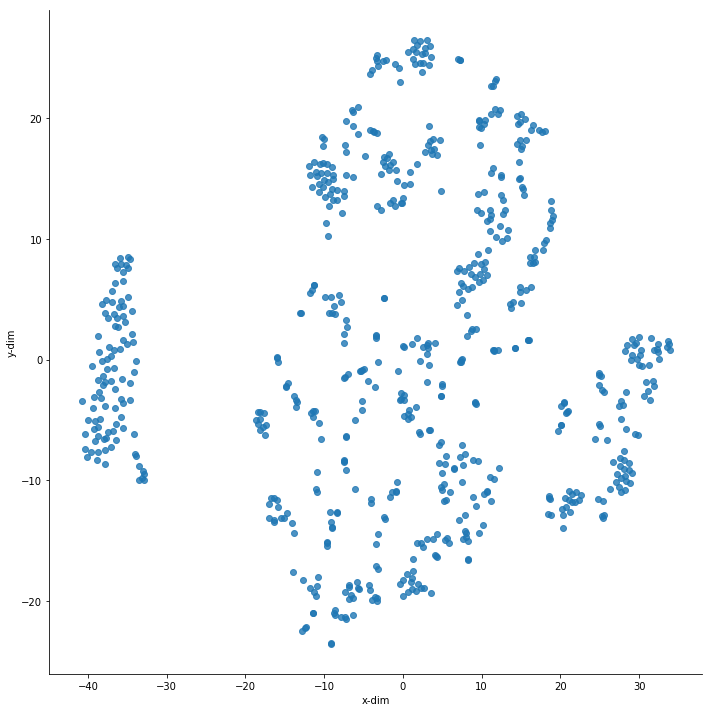

In [9]:
# plot tSNE representation of the encoding
vae_df = pd.DataFrame( data={'x-dim': sample_enc_tsne[:, 0], 'y-dim': sample_enc_tsne[:, 1], 'Model': 'VAE'})

vae_df0 = pd.DataFrame( data=sample_enc_tsne)

vae_df0.to_csv('./results/E_coli_data_tSNE_plot_Normalised.csv', index=False)

sns_plot = sns.lmplot(data=vae_df, x='x-dim', y='y-dim', palette='Reds',
                          fit_reg=False, size=10, legend=False)
plt.show()

# InfoVAE

In [11]:
from VAE.INFO_VAE_pytorch import *

In [12]:
model_dis = VAE().to(device) # create VAE model 
optimizer = optim.Adam(model_dis.parameters(), lr=1e-3) # import optimizer
print(model)

VAE(
  (input_linear): Linear(in_features=4297, out_features=2000, bias=True)
  (enc_middle): Linear(in_features=2000, out_features=100, bias=True)
  (enc_1): Linear(in_features=100, out_features=5, bias=True)
  (enc_2): Linear(in_features=100, out_features=5, bias=True)
  (dec_0): Linear(in_features=5, out_features=100, bias=True)
  (dec_middle): Linear(in_features=100, out_features=2000, bias=True)
  (output_linear): Linear(in_features=2000, out_features=4297, bias=True)
)


In [13]:
if __name__ == "__main__":
    for epoch in range(1, int(args.epochs) + 1 ): # 
        train_mmd(model_dis, epoch, train_loader, optimizer, latent_dim=5) # 
        test_mmd(model_dis, epoch, test_loader, optimizer, latent_dim=5)
        with torch.no_grad():
            sample = torch.randn(64, 5).to(device)
            sample = model.decode(sample).cpu()         

Train Epoch: 1 [0/680 (0%)]	Loss: 2984.791992
Train Epoch: 1 [200/680 (29%)]	Loss: 2845.402734
Train Epoch: 1 [400/680 (59%)]	Loss: 2812.274805
Train Epoch: 1 [600/680 (88%)]	Loss: 2805.584375
====> Epoch: 1 Average loss: 2852.6522
====> Test set loss: 88.4307
Train Epoch: 2 [0/680 (0%)]	Loss: 2815.792773
Train Epoch: 2 [200/680 (29%)]	Loss: 2813.869727
Train Epoch: 2 [400/680 (59%)]	Loss: 2801.766016
Train Epoch: 2 [600/680 (88%)]	Loss: 2777.287500
====> Epoch: 2 Average loss: 2790.1340
====> Test set loss: 88.5618
Train Epoch: 3 [0/680 (0%)]	Loss: 2759.860742
Train Epoch: 3 [200/680 (29%)]	Loss: 2769.972852
Train Epoch: 3 [400/680 (59%)]	Loss: 2767.744922
Train Epoch: 3 [600/680 (88%)]	Loss: 2749.829492
====> Epoch: 3 Average loss: 2762.5089
====> Test set loss: 88.1639
Train Epoch: 4 [0/680 (0%)]	Loss: 2760.965820
Train Epoch: 4 [200/680 (29%)]	Loss: 2764.748828
Train Epoch: 4 [400/680 (59%)]	Loss: 2777.706445
Train Epoch: 4 [600/680 (88%)]	Loss: 2752.008008
====> Epoch: 4 Average l

Train Epoch: 32 [0/680 (0%)]	Loss: 2664.923242
Train Epoch: 32 [200/680 (29%)]	Loss: 2693.714844
Train Epoch: 32 [400/680 (59%)]	Loss: 2671.787305
Train Epoch: 32 [600/680 (88%)]	Loss: 2651.640039
====> Epoch: 32 Average loss: 2667.9309
====> Test set loss: 85.7134
Train Epoch: 33 [0/680 (0%)]	Loss: 2678.136523
Train Epoch: 33 [200/680 (29%)]	Loss: 2681.203516
Train Epoch: 33 [400/680 (59%)]	Loss: 2638.912109
Train Epoch: 33 [600/680 (88%)]	Loss: 2669.685742
====> Epoch: 33 Average loss: 2667.0431
====> Test set loss: 82.9025
Train Epoch: 34 [0/680 (0%)]	Loss: 2646.388086
Train Epoch: 34 [200/680 (29%)]	Loss: 2670.534375
Train Epoch: 34 [400/680 (59%)]	Loss: 2678.986719
Train Epoch: 34 [600/680 (88%)]	Loss: 2670.248437
====> Epoch: 34 Average loss: 2665.6538
====> Test set loss: 84.6833
Train Epoch: 35 [0/680 (0%)]	Loss: 2656.190234
Train Epoch: 35 [200/680 (29%)]	Loss: 2665.445703
Train Epoch: 35 [400/680 (59%)]	Loss: 2588.485742
Train Epoch: 35 [600/680 (88%)]	Loss: 2682.578125
====>

====> Test set loss: 83.8296
Train Epoch: 63 [0/680 (0%)]	Loss: 2661.821875
Train Epoch: 63 [200/680 (29%)]	Loss: 2672.634961
Train Epoch: 63 [400/680 (59%)]	Loss: 2683.143555
Train Epoch: 63 [600/680 (88%)]	Loss: 2637.031055
====> Epoch: 63 Average loss: 2653.3174
====> Test set loss: 84.4402
Train Epoch: 64 [0/680 (0%)]	Loss: 2618.628906
Train Epoch: 64 [200/680 (29%)]	Loss: 2654.181055
Train Epoch: 64 [400/680 (59%)]	Loss: 2658.775977
Train Epoch: 64 [600/680 (88%)]	Loss: 2659.126367
====> Epoch: 64 Average loss: 2652.5138
====> Test set loss: 85.2223
Train Epoch: 65 [0/680 (0%)]	Loss: 2664.706641
Train Epoch: 65 [200/680 (29%)]	Loss: 2636.730664
Train Epoch: 65 [400/680 (59%)]	Loss: 2641.385547
Train Epoch: 65 [600/680 (88%)]	Loss: 2655.733984
====> Epoch: 65 Average loss: 2652.0720
====> Test set loss: 82.8095
Train Epoch: 66 [0/680 (0%)]	Loss: 2631.136914
Train Epoch: 66 [200/680 (29%)]	Loss: 2643.291992
Train Epoch: 66 [400/680 (59%)]	Loss: 2659.805078
Train Epoch: 66 [600/680 (

====> Test set loss: 84.1847
Train Epoch: 94 [0/680 (0%)]	Loss: 2649.060937
Train Epoch: 94 [200/680 (29%)]	Loss: 2644.243750
Train Epoch: 94 [400/680 (59%)]	Loss: 2648.055273
Train Epoch: 94 [600/680 (88%)]	Loss: 2653.112109
====> Epoch: 94 Average loss: 2644.6266
====> Test set loss: 84.4267
Train Epoch: 95 [0/680 (0%)]	Loss: 2643.329102
Train Epoch: 95 [200/680 (29%)]	Loss: 2654.843555
Train Epoch: 95 [400/680 (59%)]	Loss: 2596.234961
Train Epoch: 95 [600/680 (88%)]	Loss: 2643.633398
====> Epoch: 95 Average loss: 2644.0273
====> Test set loss: 83.2873
Train Epoch: 96 [0/680 (0%)]	Loss: 2641.399219
Train Epoch: 96 [200/680 (29%)]	Loss: 2629.088672
Train Epoch: 96 [400/680 (59%)]	Loss: 2653.516602
Train Epoch: 96 [600/680 (88%)]	Loss: 2652.532227
====> Epoch: 96 Average loss: 2643.9668
====> Test set loss: 84.5901
Train Epoch: 97 [0/680 (0%)]	Loss: 2641.998633
Train Epoch: 97 [200/680 (29%)]	Loss: 2647.337500
Train Epoch: 97 [400/680 (59%)]	Loss: 2628.429492
Train Epoch: 97 [600/680 (

In [14]:
## Find the latent representation/encode the data
sample_enc_b_dis = model.encode(dataset_train.x_data.to(device).view(-1, 4297))[0].cpu()

sample_enc_dis=sample_enc_b_dis.detach().numpy()
print(sample_enc_dis[:,0].shape)

sample_dec_b_dis= model.decode(sample_enc_b_dis.cuda().view(-1, 5)).cpu()
sample_dec_dis=sample_dec_b_dis.detach().numpy()

data_encoded_dis=pd.DataFrame(data=sample_enc_dis)
data_encoded_dis.to_csv('./results/E_coli_data_encoded_dis_Normalised.csv', index=False)
data_decoded_dis=pd.DataFrame(data=sample_dec)
data_decoded_dis.to_csv('./results/E_coli_sample_dec_dis_Normalised.csv', index=False)


(680,)


In [15]:
sample_enc_b_dis_mean = model.encode(dataset_train.x_data.to(device).view(-1, 4297))[0].cpu()
sample_enc_b_dis_std = model.encode(dataset_train.x_data.to(device).view(-1, 4297))[1].cpu()
sample_enc_dis_mean=sample_enc_b_dis_mean.detach().numpy()
sample_enc_dis_std=sample_enc_b_dis_std.detach().numpy()
data_encoded_dis_mean=pd.DataFrame(data=sample_enc_dis_mean)
#data_encoded_dis_mean.to_csv('./results/data_encoded_dis_mean.csv', index=False)
data_encoded_dis_std=pd.DataFrame(data=sample_enc_dis_std)
#data_encoded_dis_std.to_csv('./results/data_encoded_dis_std.csv', index=False)

In [16]:
sample_enc_tsne_dis=TSNE(n_components=2).fit_transform(sample_enc_dis)

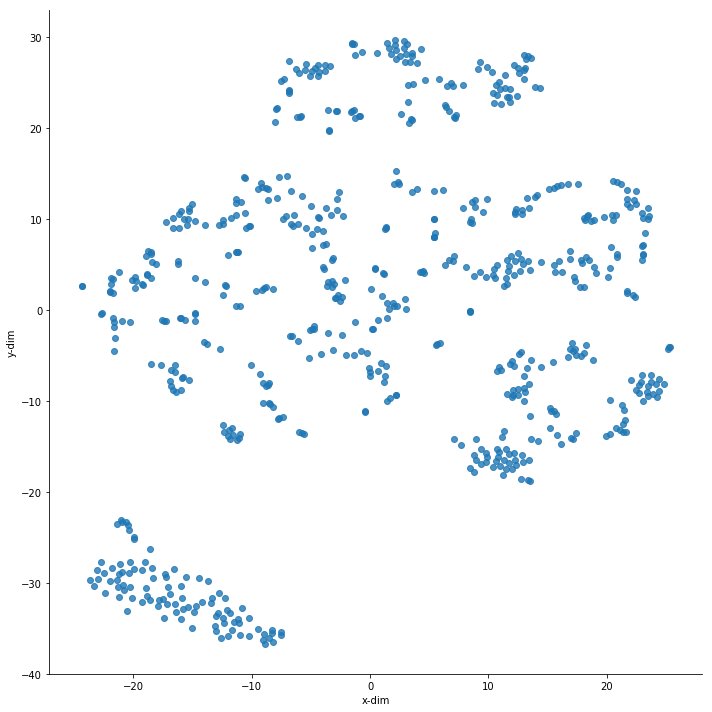

In [17]:
vae_df_dis = pd.DataFrame( data={'x-dim': sample_enc_tsne_dis[:, 0], 'y-dim': sample_enc_tsne_dis[:, 1], 'Model': 'VAE'})

vae_df_dis0 = pd.DataFrame( data=sample_enc_tsne_dis)


vae_df_dis0.to_csv('./results/E_coli_data_tSNE_plot_dis_Normalised.csv', index=False)

#vae_df_dis.to_csv('./results/data_tSNE_plot_dis_dataframe.csv', index=False)

sns_plot = sns.lmplot(data=vae_df_dis, x='x-dim', y='y-dim', palette='Reds',
                          fit_reg=False, size=10, legend=False)
plt.show()

